In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
(X_train,y_train), (X_test, y_test)=datasets.cifar10.load_data()

In [5]:
y_train=y_train.reshape(-1,)

In [6]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

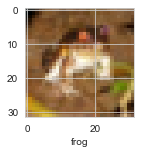

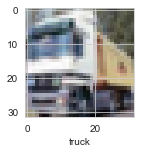

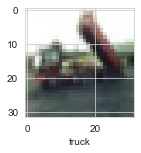

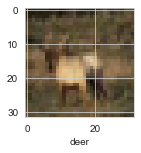

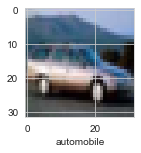

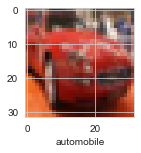

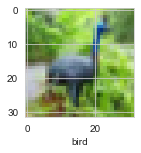

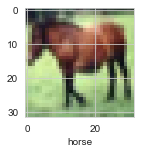

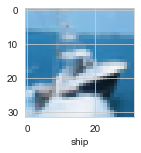

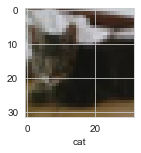

In [11]:
plot_sample(X_train,y_train,0)
plot_sample(X_train,y_train,1)
plot_sample(X_train,y_train,2)
plot_sample(X_train,y_train,3)
plot_sample(X_train,y_train,4)
plot_sample(X_train,y_train,5)
plot_sample(X_train,y_train,6)
plot_sample(X_train,y_train,7)
plot_sample(X_train,y_train,8)
plot_sample(X_train,y_train,9)

In [12]:
X_train=X_train/255
X_test=X_test/255

In [13]:
from sklearn.metrics import confusion_matrix , classification_report

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',  kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_uniform'),
    layers.Dense(10, activation='softmax')
])


In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 505s 321ms/step - loss: 1.7873 - accuracy: 0.3361
Epoch 2/10
1563/1563 [==============================] - 475s 304ms/step - loss: 1.0731 - accuracy: 0.6201
Epoch 3/10
 429/1563 [=======>......................] - ETA: 5:44 - loss: 0.9213 - accuracy: 0.6693

In [ ]:
cnn.evaluate(X_train,y_train)

In [ ]:
cnn.evaluate(X_test,y_test)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:20]

In [ ]:
y_test[:20]

In [ ]:
plot_sample(X_test, y_test,20)

In [ ]:
classes[y_classes[20]]

In [ ]:
classes[y_classes[20]]